In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
import pandas as pd
import scipy.stats
%matplotlib inline


# Poisson Verteilung:
- mittels `numpy.random` eine Liste mit Zufallszahlen füllen (n = 5000?)
- Häufigkeit aller Zahlen herausfinden 
    - `np.unique`
    - eigene Funktion
- Graphisch auswerten
    - Plot der Verteilung 
    - curve fit durch die Verteilung

## Liste erstellen

[Text(0, 0.5, 'number'), Text(0.5, 0, 'list index')]

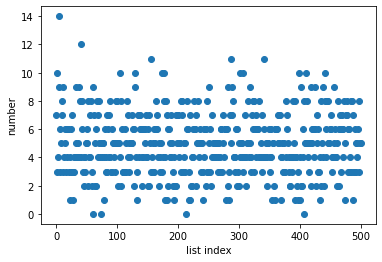

In [2]:
n = 500
Lambda = 5
poisson_list = []               # Instanziieren der (noch) leeren Liste

for i in range(n):
    poisson_list.append(np.random.poisson(Lambda)) # Füllen der Liste
    
poisson_list[0:10]             # Anzeigen der ersten 10 Listenelemente 
_, ax = plt.subplots()
ax.scatter([i for i in range(n)], poisson_list)
ax.set(ylabel="number", xlabel="list index")

## Häufigkeit der Zahlen

In [3]:
def count_occurences(list_to_check: list) -> list:
    '''
    welche Elemente kommen in der Liste vor und wie oft?
    '''
    members = []
    occurence = []
    list_to_check.sort()
    members.append(list_to_check[0])
    for i, number_from_list in enumerate(list_to_check[0:-1]):
        if number_from_list != list_to_check[i+1]:
            members.append(list_to_check[i+1])
    for member in members:
        count = 0
        for number_from_list in list_to_check:
            if number_from_list == member:
                count +=1
        occurence.append(count)
    return members, occurence

In [4]:
number, count = np.unique(poisson_list, return_counts=True)

## Graphische Auswertung
### Plot der Verteilung

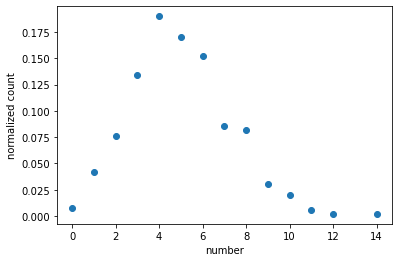

In [5]:
fig, ax = plt.subplots()
ax.scatter(number, [i/n for i in count])
ax.set(xlabel="number", ylabel="normalized count");

### Curve fit

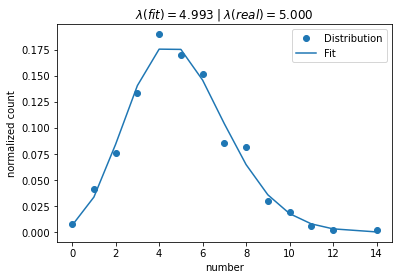

In [8]:
def poisson_func(k: int, lamb: float) -> int:
    '''poisson Funktion für den Fit'''
    return scipy.stats.poisson.pmf(k, lamb)

popt, pcov = scipy.optimize.curve_fit(poisson_func, number, [i/n for i in count]) # fit
x = np.arange(0,13,1) # neue x-werte

## plot der daten + fit
fig,ax = plt.subplots()
ax.plot(number, [i/n for i in count],ls="", marker="o",color="tab:blue", label="Distribution")
ax.plot(number, poisson_func(number, *popt), label="Fit")
ax.set(ylabel="normalized count", xlabel="number", title=r"$\lambda(fit) = {0:.3f}\;|\; \lambda(real) = {1:.3f}$".format(popt[0], Lambda))
ax.legend()